In [6]:
import sys

import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.stats import spearmanr, pearsonr
sys.path.append("../utils")
from utils import load_data
from sklearn.preprocessing import StandardScaler
data_train, data_test , targets= load_data(raw=True)
scaler = StandardScaler()

In [9]:
data = data_train.iloc[1:, 1:]
# Calculate per-gene standard deviation (SD) and variance
gene_variance = data.var(axis=1)
gene_std = data.std(axis=1)

# Display genes with the highest heterogeneity
heterogeneous_genes = gene_variance.sort_values(ascending=False)
print(heterogeneous_genes.head(10))  # Top 10 genes with highest variance


46     1.749883e+06
530    1.009149e+06
498    8.950592e+05
43     8.214959e+05
224    7.990633e+05
45     6.113164e+05
564    5.973404e+05
308    5.912898e+05
565    5.690967e+05
215    5.086228e+05
dtype: float64


In [10]:
# Calculate Coefficient of Variation (CV)
cv = data.std(axis=1) / data.mean(axis=1)
cv = cv.sort_values(ascending=False)

# Top heterogeneous genes
print("Top genes with highest CV:")
print(cv.head(10))


Top genes with highest CV:
46     27.911612
530    21.011917
498    20.219139
43     19.494424
224    18.684433
45     17.096245
308    16.260701
565    16.060325
564    16.041411
12     14.573379
dtype: float64


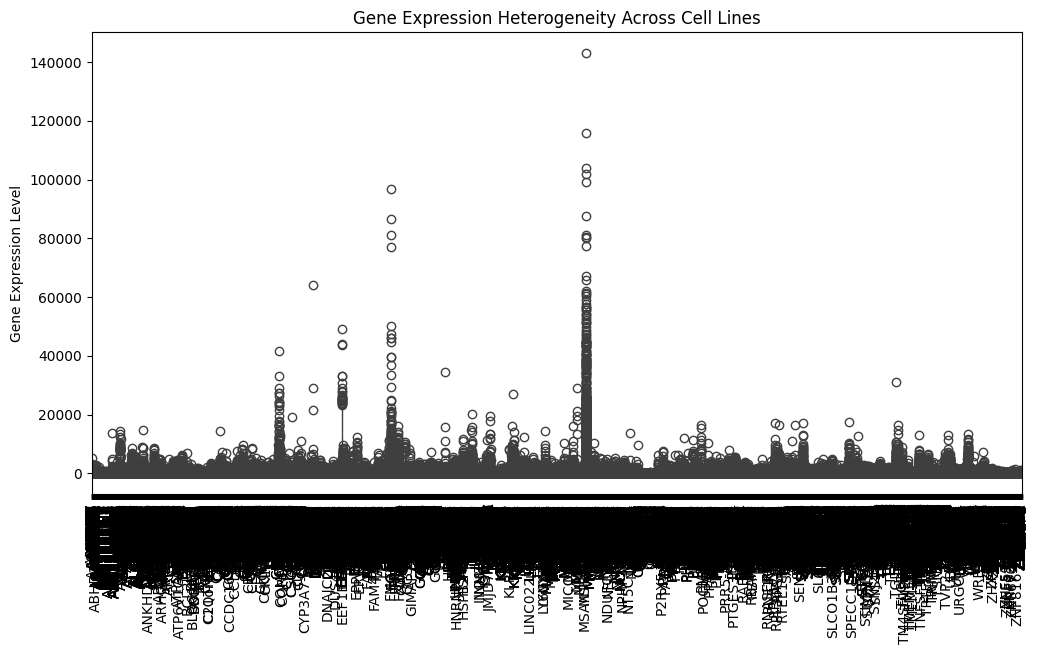

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for gene expression across cell lines
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Gene Expression Heterogeneity Across Cell Lines")
plt.ylabel("Gene Expression Level")
plt.show()


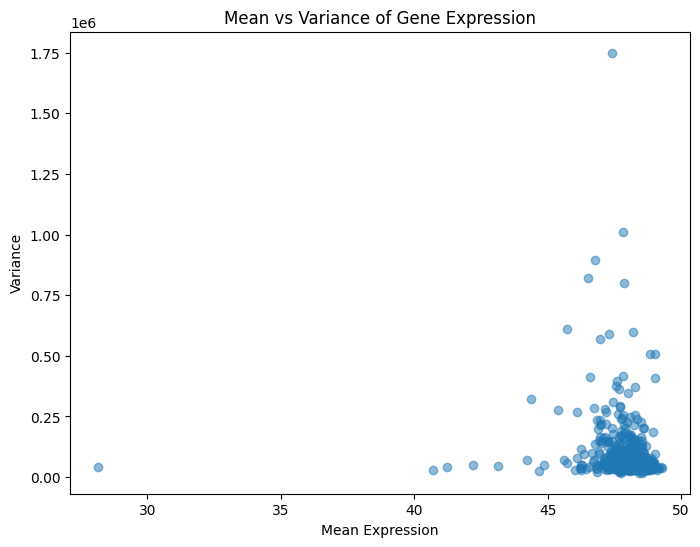

In [13]:
# Mean vs variance scatter plot
mean_expression = data.mean(axis=1)
plt.figure(figsize=(8, 6))
plt.scatter(mean_expression, gene_variance, alpha=0.5)
plt.xlabel("Mean Expression")
plt.ylabel("Variance")
plt.title("Mean vs Variance of Gene Expression")
plt.show()

In [111]:
from pathlib import Path
project_root = Path().resolve().parent.parent
sys.path.append(str(project_root))
# Load the data
data_path = project_root / 'data' /'extra_data'/'gene_attribute_matrix_cleaned.txt'

extra_data = pd.read_csv(data_path, sep='\t', index_col=0)
extra_data = extra_data.apply(pd.to_numeric, errors='coerce').astype(np.float64)

/var/folders/bn/rnsxwd_n7wg576xzvtvcq28m0000gn/T/ipykernel_21644/2631429096.py:7: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [112]:

extra_data = extra_data.T
extra_data = extra_data.iloc[:, 2:]
# Get rid of first two rows
extra_data = extra_data.iloc[3:]

# Get common columns
common_columns = extra_data.columns.intersection(data_train.columns)

print(f'Common columns: {common_columns}')
# Only keep common columns

extra_data_clean = extra_data[common_columns]

data_train_clean = data_train[common_columns]

X_train_scaled = scaler.fit_transform(data_train_clean)

extra_data_scaled = scaler.fit_transform(extra_data_clean)

Common columns: Index(['HUWE1', 'TPT1', 'EEF1A1', 'RPS18', 'RPL23A', 'RPL41', 'RPS2', 'RPL39',
       'RPS15A', 'RPS27',
       ...
       'UGT2A3', 'SLC17A3', 'SLC2A2', 'BPI', 'P2RX3', 'LGALS13', 'CCR6',
       'JPH2', 'REN', 'LHX5'],
      dtype='object', length=11075)


In [113]:
print (X_train_scaled.shape) 
print (extra_data_scaled.shape)

X_train_scaled_crop = X_train_scaled[:623, :]
print (X_train_scaled_crop.shape)

(742, 11075)
(623, 11075)
(623, 11075)


In [114]:
# Step 3: Correlation Analysis
correlation_values = [
    pearsonr(X_train_scaled_crop[i, :], extra_data_scaled[i, :])[0]  # Use NumPy slicing
    for i in range(X_train_scaled_crop.shape[0])  # Iterate over rows (genes)
]
print(f"Mean Pearson correlation between datasets: {np.mean(correlation_values):.4f}")


Mean Pearson correlation between datasets: -0.0073


Mean Gene-Wise Pearson Correlation: -0.0066
Overall Pearson Correlation (Flattened): -0.0066
Overall Spearman Correlation (Flattened): -0.0111


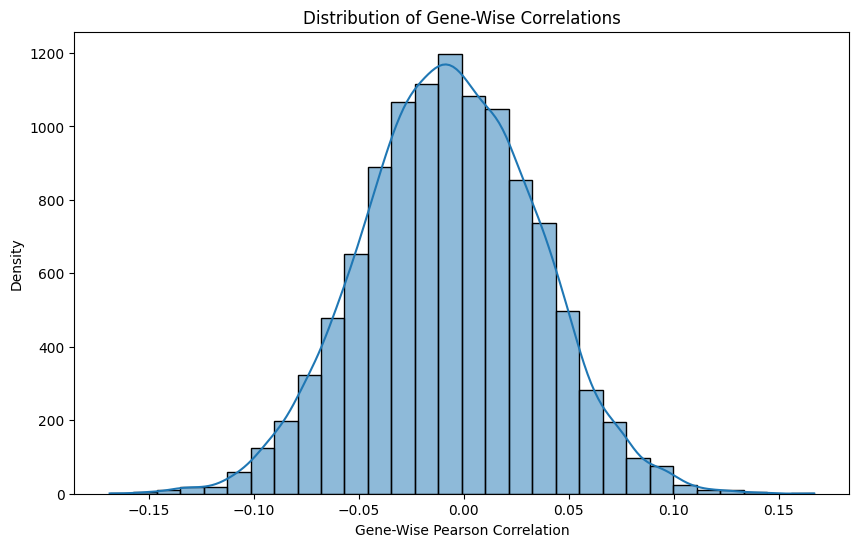

In [117]:
# Per-Column (Gene-Wise) Correlation
per_column_correlation = [
    pearsonr(X_train_scaled_crop[:, j], extra_data_scaled[:, j])[0]
    for j in range(X_train_scaled_crop.shape[1])
]
print(f"Mean Gene-Wise Pearson Correlation: {np.mean(per_column_correlation):.4f}")

#Overall Correlation (Flattened)
flattened_pearson_corr, _ = pearsonr(X_train_scaled_crop.flatten(), extra_data_scaled.flatten())
flattened_spearman_corr, _ = spearmanr(X_train_scaled_crop.flatten(), extra_data_scaled.flatten())
print(f"Overall Pearson Correlation (Flattened): {flattened_pearson_corr:.4f}")
print(f"Overall Spearman Correlation (Flattened): {flattened_spearman_corr:.4f}")

#Distribution of Gene-Wise Correlations
plt.figure(figsize=(10, 6))
sns.histplot(per_column_correlation, bins=30, kde=True)
plt.xlabel("Gene-Wise Pearson Correlation")
plt.ylabel("Density")
plt.title("Distribution of Gene-Wise Correlations")
plt.show()



Mean Standard Deviation (Dataset 1): 0.9985
Mean Standard Deviation (Dataset 2): 1.0000


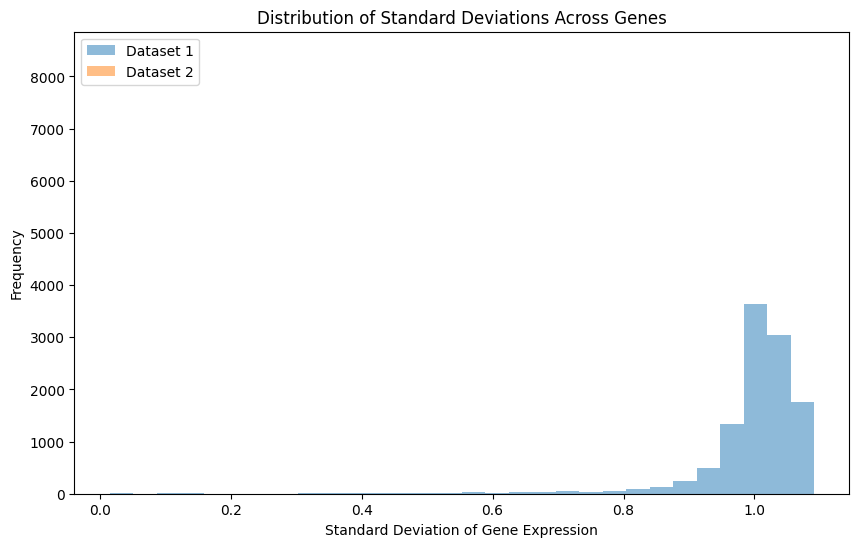

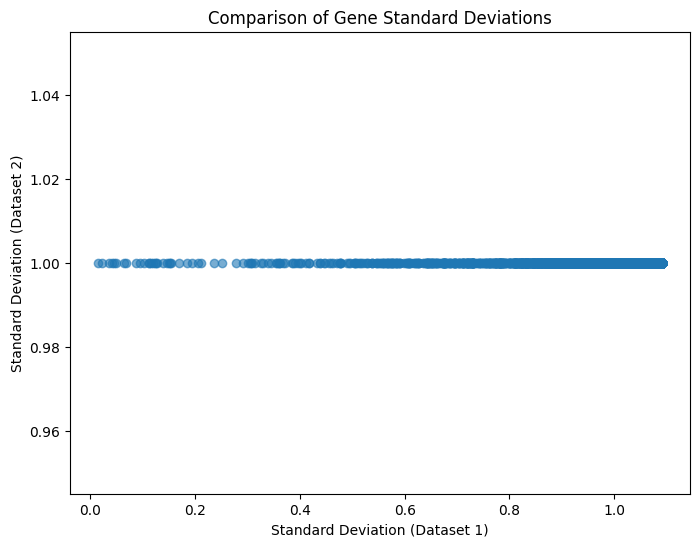

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Compute standard deviation of each gene across all cell lines
std_dev_dataset1 = np.std(X_train_scaled_crop, axis=0)  # Across rows (cell lines)
std_dev_dataset2 = np.std(extra_data_scaled, axis=0)  # Across rows (cell lines)

# Print summary statistics
print(f"Mean Standard Deviation (Dataset 1): {np.mean(std_dev_dataset1):.4f}")
print(f"Mean Standard Deviation (Dataset 2): {np.mean(std_dev_dataset2):.4f}")

# Optional: Visualize the distribution of standard deviations
plt.figure(figsize=(10, 6))
plt.hist(std_dev_dataset1, bins=30, alpha=0.5, label="Dataset 1")
plt.hist(std_dev_dataset2, bins=30, alpha=0.5, label="Dataset 2")
plt.xlabel("Standard Deviation of Gene Expression")
plt.ylabel("Frequency")
plt.title("Distribution of Standard Deviations Across Genes")
plt.legend()
plt.show()

# Scatter plot of standard deviations
plt.figure(figsize=(8, 6))
plt.scatter(std_dev_dataset1, std_dev_dataset2, alpha=0.6)
plt.xlabel("Standard Deviation (Dataset 1)")
plt.ylabel("Standard Deviation (Dataset 2)")
plt.title("Comparison of Gene Standard Deviations")
plt.show()


In [1]:
gene_variance = data_train_clean.var(axis=1)
gene_std = data_train_clean.std(axis=1)

# Display genes with the highest heterogeneity
heterogeneous_genes = gene_variance.sort_values(ascending=False)
print(heterogeneous_genes.head(10))  # Top 10 genes with highest variance

NameError: name 'data_train_clean' is not defined